# Analisis Exploratorio - Heart Disease Databases

## Introducción

Este es un analisis exploratorio sobre una muestra el dataset unificado de "Heart Disease Databases"
Dicho dataset comprende 3 bases de datos sobre diganosticos de enfermedades cardiacas en tres diferentes regiones:

1. Cleveland Clinic Foundation (processed.cleveland.data)
2. Hungarian Institute of Cardiology, Budapest (Hungarian_Switzerland.xlsx)
3. V.A. Medical Center, Long Beach, CA (LongBeachData.pdf)

El dataset original tenía 4 regiones ademas de tener 76 características por registros. 
En esta muestra solo se usarán las tres regiones anteriores y solamente 14 de las 76 caracteristicas y una muestra con 797 registros.

Se consiguieron los datasets en diferentes formatos, los cuales ya fueron procesados y unificados en un unico dataset en formato parquet [enfermedad_cardiaca_encoded.parquet](DataFiles/enfermedad_cardiaca_encoded.parquet).
Será con este último con el que se realizará el analisis en busca de patrones o tendencias.


### Descripción de variables

A continuación se describen las variables contenidas en el dataset, incluyendo su tipo de dato, unidades de medida y la codificación de las variables categóricas.

---

### Variables Clínicas y Demográficas

*   **city** [Ciudad] | `Categórico`  
    Ciudad donde se realizó la toma de la muestra (agregado para registro geográfico).  
    *Valores:* `['Cleveland', 'Budapest', 'Long Beach']`

*   **ID_patient** [Id del paciente] | `Numérico`  
    Identificador único del paciente dentro de su respectiva región.

*   **age** [Edad] | `Numérico`  
    Edad del paciente expresada en años.

*   **sex** [Sexo] | `Categórico`  
    Sexo registrado del paciente.  
    *Valores:* `['female', 'male']`

*   **chest_pain_type** [Tipo de dolor de pecho] | `Categórico`  
    Clasificación del dolor torácico:
    * `1`: Angina típica.
    * `2`: Angina atípica.
    * `3`: Dolor no anginoso.
    * `4`: Asintomático.

*   **resting_blood_pressure** [Presión arterial en reposo] | `Numérico`  
    Presión arterial sistólica medida en **mm Hg** al momento de su ingreso al hospital.

*   **serum_cholestoral** [Colesterol sérico] | `Numérico`  
    Nivel de colesterol total en sangre medido en **mg/dl**.

*   **fasting_blood_sugar** [Azúcar en sangre en ayunas] | `Booleano`  
    Indica si el nivel de azúcar en sangre en ayunas es superior a **120 mg/dl**.  
    *`1` = Verdadero; `0` = Falso.*

*   **resting_EEG** [Resultados electrocardiográficos en reposo] | `Categórico`  
    Resultados del electrocardiograma en estado de reposo:
    * `0`: Normal.
    * `1`: Anomalía de la onda ST-T (inversión de la onda T y/o elevación o depresión del segmento ST > 0,05 mV).
    * `2`: Hipertrofia ventricular izquierda probable o confirmada.

*   **maximum_heart_rate** [Frecuencia cardíaca máxima] | `Numérico`  
    Frecuencia cardíaca máxima alcanzada durante la prueba de esfuerzo.

*   **exercise_induced_angina** [Angina inducida por el ejercicio] | `Booleano`  
    Presencia de dolor de pecho (angina) provocado por el esfuerzo físico.  
    *`1` = Sí; `0` = No.*

*   **ST_depression** [Depresión del segmento ST] | `Flotante`  
    Descenso del segmento ST inducido por el ejercicio en comparación con el estado de reposo, medido en **mm**.

*   **slope_ST** [Pendiente del segmento ST] | `Categórico`  
    La pendiente del segmento ST durante el pico máximo del ejercicio:
    * `1`: Pendiente ascendente (Upsloping).
    * `2`: Plano (Flat).
    * `3`: Pendiente descendente (Downsloping).

*   **number_major_vessels** [Número de vasos principales] | `Numérico`  
    Número de vasos sanguíneos principales (0-3) identificados mediante fluoroscopia.

*   **thal** [Talasemia] | `Categórico`  
    Resultado de la gammagrafía cardíaca:
    * `3`: Normal.
    * `6`: Defecto fijo.
    * `7`: Defecto reversible.

---

### Variable Objetivo (Target)

*   **diagnosis_heart_disease** [Diagnóstico de enfermedad cardíaca] | `Categórico`  
    Resultado del diagnóstico (estado angiográfico de la enfermedad):
    * `0`: < 50% de estrechamiento del diámetro (Sin enfermedad coronaria).
    * `1`: > 50% de estrechamiento del diámetro (Presencia de enfermedad coronaria).

> **Nota:** Aunque los valores principales son `0` y `1`, en registros específicos (como el de Cleveland) se pueden encontrar los niveles `2, 3 y 4`, que indican grados más severos de estrechamiento arterial.

## Desarrollo

### Importamos librerías

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme('paper')
sns.set_palette('Set2')

In [70]:
df = pd.read_parquet('./DataFiles/enfermedad_cardiaca_encoded.parquet', engine='pyarrow')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797 entries, 0 to 796
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   city                     797 non-null    category
 1   ID_patient               797 non-null    int64   
 2   age                      797 non-null    int64   
 3   sex                      597 non-null    category
 4   chest_pain_type          797 non-null    int64   
 5   resting_blood_pressure   740 non-null    float64 
 6   serum_cholestoral        767 non-null    float64 
 7   fasting_blood_sugar      797 non-null    bool    
 8   resting_EEG              796 non-null    float64 
 9   maximum_heart_rate       743 non-null    float64 
 10  exercise_induced_angina  797 non-null    bool    
 11  ST_depression            741 non-null    float64 
 12  slope_ST                 505 non-null    float64 
 13  number_major_vessels     304 non-null    float64 
 14  thal      

In [71]:
df.head()

,city,ID_patient,age,sex,chest_pain_type,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_EEG,maximum_heart_rate,exercise_induced_angina,ST_depression,slope_ST,number_major_vessels,thal,diagnosis_heart_disease
0,Budapest,1,28,male,2,130.0,132.0,False,2.0,185.0,False,0.0,NaN,NaN,NaN,0
1,Budapest,2,29,male,2,120.0,243.0,False,0.0,160.0,False,0.0,NaN,NaN,NaN,0
2,Budapest,3,29,male,2,140.0,NaN,False,0.0,170.0,False,0.0,NaN,NaN,NaN,0
3,Budapest,4,30,female,1,170.0,237.0,False,1.0,170.0,False,0.0,NaN,NaN,6.0,0
4,Budapest,5,31,female,2,100.0,219.0,False,1.0,150.0,False,0.0,NaN,NaN,NaN,0


### Primeras intuciones

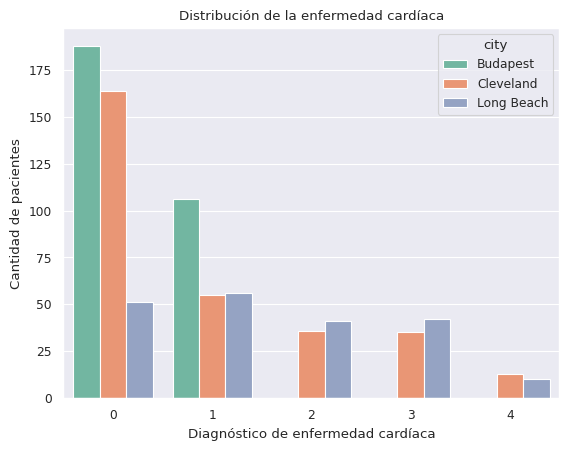

In [72]:
sns.countplot(data=df, x='diagnosis_heart_disease', hue='city')
plt.title('Distribución de la enfermedad cardíaca')
plt.xlabel('Diagnóstico de enfermedad cardíaca')
plt.ylabel('Cantidad de pacientes')
plt.show()

El dataset de **Budapest** solamente tiene dos valores (`0` y `1`), mientras que **Cleveland** y **Long Beach** incluyen una escala sobre la gravedad de la enfermedad.

   Desde `0` para pacientes sanos y una escala de `1` a `4`, en función de la gravedad. 

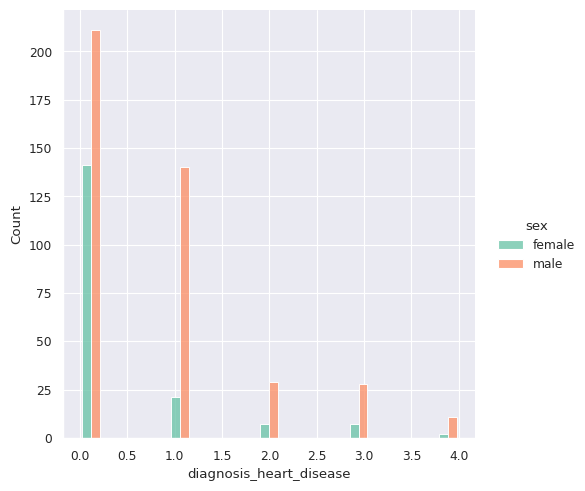

In [73]:
sns.displot(data=df, x='diagnosis_heart_disease', hue='sex', multiple='dodge', shrink=0.8, kind='hist')

No parece que haya correlación entre el **sexo** del paciente con la gravedad de la enfermedad. Mas bién parece ser un desbalace de las muestras de los datos; se registraron más pacientes `hombres` que `mujeres`.

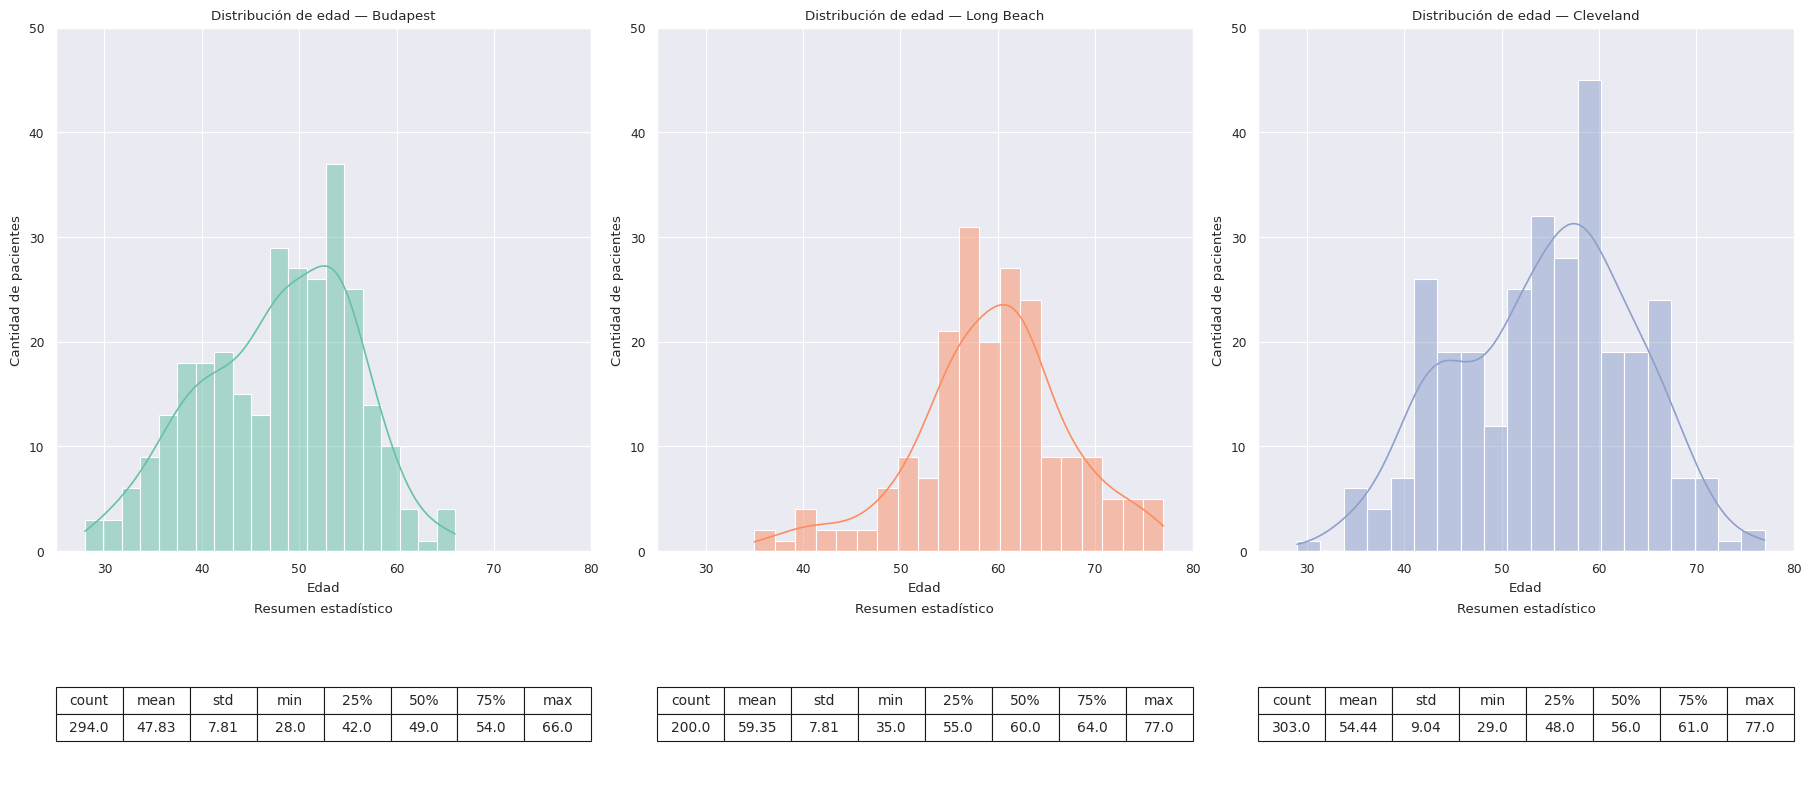

In [74]:
# Histogramas + tabla resumen de la distribución de edades por ciudad
cities = cities = df['city'].unique()

fig = plt.figure(constrained_layout=True, figsize=(18, 8))
gs = fig.add_gridspec(2, len(cities), height_ratios=[3, 1])

for i, city in enumerate(cities):
    ages = df.loc[df['city'] == city, 'age'].dropna()

    ax_hist = fig.add_subplot(gs[0, i])
    sns.histplot(ages, bins=20, kde=True, ax=ax_hist, color=sns.color_palette()[i],)
    ax_hist.set_title(f'Distribución de edad — {city}')
    ax_hist.set_xlabel('Edad')
    ax_hist.set_ylabel('Cantidad de pacientes')
    ax_hist.set_ylim(0,50)
    ax_hist.set_xlim(25,80)

    summary = ages.describe().round(2).to_frame().T
    ax_table = fig.add_subplot(gs[1, i])
    ax_table.axis('off')
    tbl = ax_table.table(cellText=summary.values,
                         colLabels=summary.columns,
                         cellLoc='center',
                         loc='center')
    tbl.auto_set_font_size(False)
    tbl.set_fontsize(10)
    tbl.scale(1, 1.3)
    ax_table.set_title('Resumen estadístico', pad=10)

plt.show()

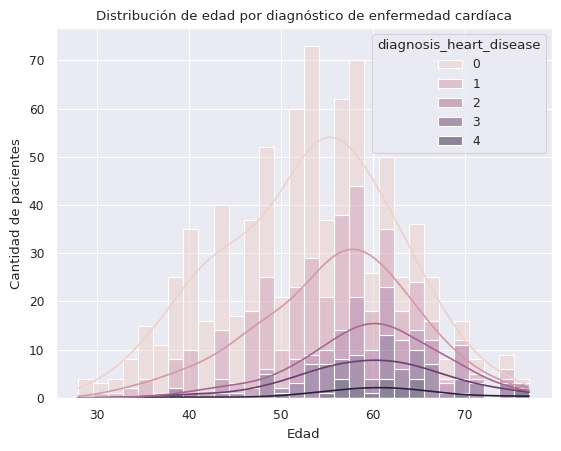

In [75]:
sns.histplot(data=df, x='age', hue='diagnosis_heart_disease', multiple='stack', bins=30, kde=True)
plt.title('Distribución de edad por diagnóstico de enfermedad cardíaca')
plt.xlabel('Edad')
plt.ylabel('Cantidad de pacientes')
plt.show()

Se puede observar una ligera tendencia positiviva con la distribución de la edad con la gravedad de el registro de enfermedades cada vez más graves; se puede deber a la muestra de población, pues esta está algo desbalanceada y en los promedios de edad están por los `55` años.

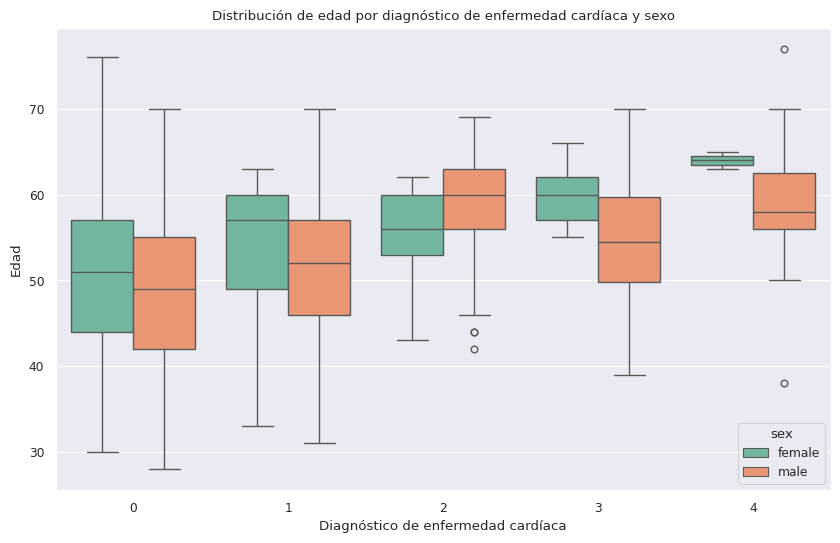

In [76]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='diagnosis_heart_disease', y='age', hue='sex')
plt.title('Distribución de edad por diagnóstico de enfermedad cardíaca y sexo')
plt.xlabel('Diagnóstico de enfermedad cardíaca')
plt.ylabel('Edad')
plt.show()

Si se puede observar una correlación entre el diagnóstico de enfermedades más graves en pacientes con edades más avanzadas. Pero no podemos decir lo mismo si hay tendencias con respecto al **sexo** de los pacientes, pues la base de datos está desbalanceada en este atributo.

### Mapa de calor

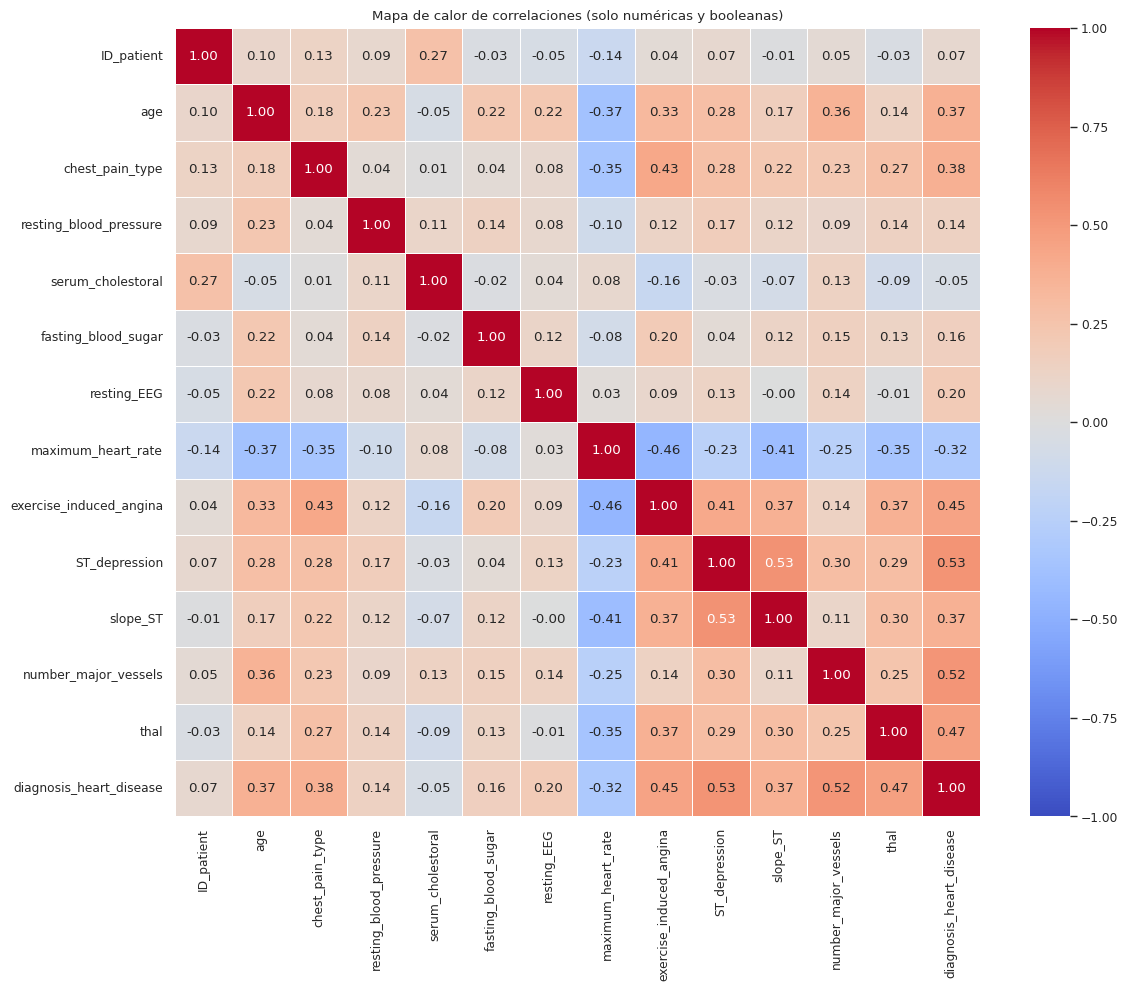

In [77]:
# Seleccionar solo columnas numéricas y booleanas
num_bool = df.select_dtypes(include=['number', 'bool'])

corr = num_bool.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, linewidths=.5)
plt.title('Mapa de calor de correlaciones (solo numéricas y booleanas)')
plt.tight_layout()
plt.show()

Se observan correlaciones entre distintas variables variables, principalemente con variables como **slope_ST**, **ST_depression**, o correlaciones inversas principalmente con **maximun_heart_rate**, aun que casi ninguna de estas variables supera con un valor de `0.5` para determinar que la correlación es fuerte.

Esto sugiere que **dignosis_heart_disease** pueda ser una variable multifactorial, es decir, que su valor depende de principalmente de distintas variables.


### Principales correlaciones

<Figure size 1000x600 with 0 Axes>

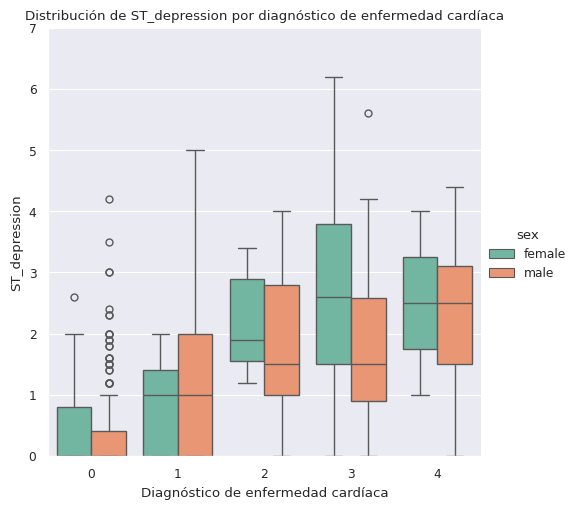

In [78]:
# ST_depression diagnosis_heart_disease, variables con mayor correlación
map_sex = {'female': 'Mujer', 'male': 'Hombre'}

plt.figure(figsize=(10, 6))
sns.catplot(data=df, x='diagnosis_heart_disease', y='ST_depression', hue='sex', kind='box',)
plt.title('Distribución de ST_depression por diagnóstico de enfermedad cardíaca')
plt.xlabel('Diagnóstico de enfermedad cardíaca')
plt.ylabel('ST_depression')
plt.ylim(0, 7)
plt.show()


<Figure size 1000x600 with 0 Axes>

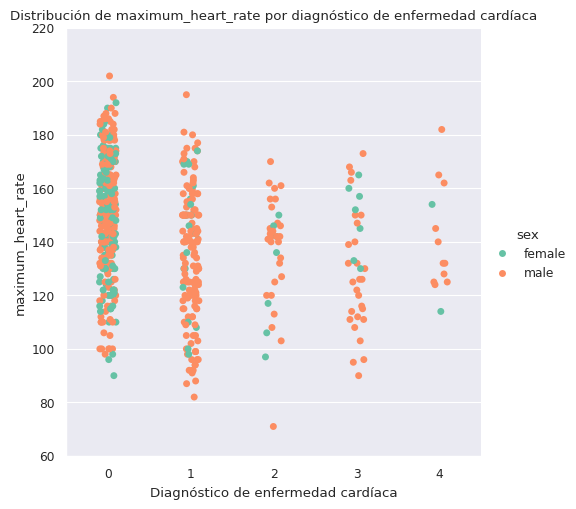

In [79]:
# maximum_heart_rate_achieved vs diagnosis_heart_disease
plt.figure(figsize=(10, 6))
sns.catplot(data=df, x='diagnosis_heart_disease', y='maximum_heart_rate', hue='sex')
plt.title('Distribución de maximum_heart_rate por diagnóstico de enfermedad cardíaca')
plt.xlabel('Diagnóstico de enfermedad cardíaca')
plt.ylabel('maximum_heart_rate')
plt.ylim(60, 220)
plt.show()

Si bien mostraba una correlación negativa, no parece tener gran influencia **maximum_heart_rate** al determinar el dignostico de enfermedad, debido a la alta varianza dentro de cada caso de diganóstico, aun que se puede decir que una frecuencia cardíaca más alta luego de las prubas, puede ser un factor protector a enfermedades cardiácas. 

<Figure size 1000x600 with 0 Axes>

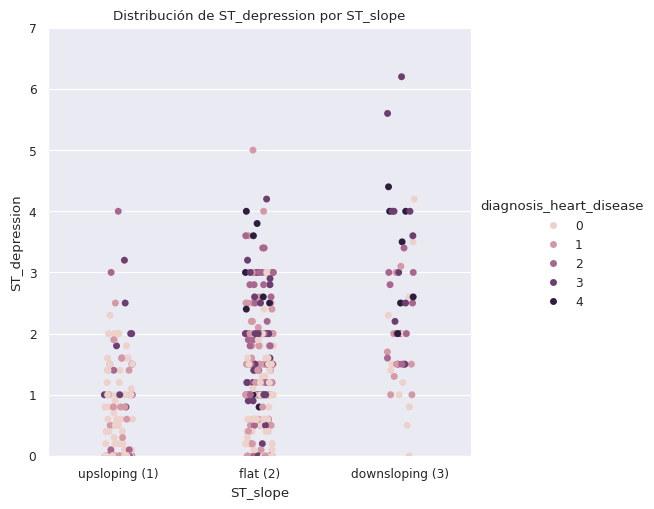

In [90]:
# ST_depression vx ST_slop

plt.figure(figsize=(10, 6))
sns.catplot(
    data=df, 
    x=df['slope_ST'].map({1: 'upsloping (1)', 2: 'flat (2)', 3: 'downsloping (3)'}), 
    y='ST_depression', 
    hue='diagnosis_heart_disease',
    order=['upsloping (1)', 'flat (2)', 'downsloping (3)'],
    )
plt.title('Distribución de ST_depression por ST_slope')
plt.xlabel('ST_slope')
plt.ylabel('ST_depression')
plt.ylim(0, 7)
plt.show()

In [83]:
df['slope_ST'].value_counts(dropna=False)

slope_ST
NaN    292
2.0    284
1.0    170
3.0     51
Name: count, dtype: int64

In [87]:
292*100/(df.shape[0])

36.637390213299874

Si bien ni **ST_depression** ni **slope_ST** tuvieron una puntuación de correlación tan alta con el diagnóstico, entre la dos si se puede observar una tendencia a diagnóssticos más graves cuando ambas variblaes tienen valores altos, o mas bien dicho, cuando se observa una pendiente ST negativa (equivalente a `3` en **slope_ST**) 

> **Nota**: Tenemos que considerar que para este último gráfico, el **36% de los registros fueron perdidos**. lo que puede afectar a la forma del gráfico.

<Figure size 1000x600 with 0 Axes>

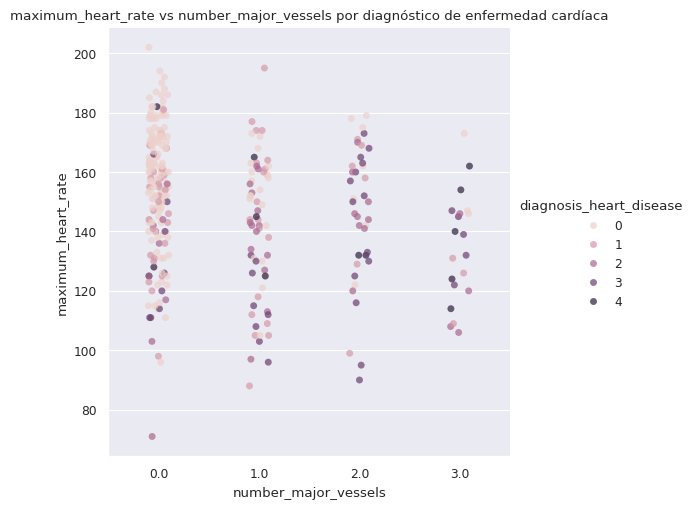

In [13]:
# thalach vs number_major_vessels colored by diagnosis_heart_disease
plt.figure(figsize=(10, 6))
sns.catplot(data=df, x='number_major_vessels', y='maximum_heart_rate', hue='diagnosis_heart_disease', alpha=0.7)
plt.title('maximum_heart_rate vs number_major_vessels por diagnóstico de enfermedad cardíaca')
plt.ylabel('maximum_heart_rate')
plt.xlabel('number_major_vessels')
plt.show()

Tal como en las variables anteriores, si existe una tendencia ligera de la gravedad dianostico con la combinación de las variables entre **maximum_heart_rate** con **numbre_major_vessels**, Se observa como entre entre mayor número de vasos afectados, el ritmo cardiaco suele tener valores en un rango más corto y un diagnóstico mas grave.

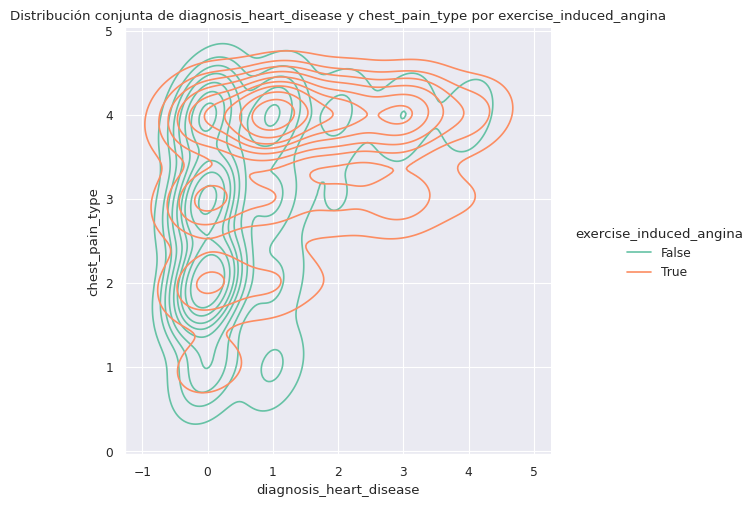

In [ ]:
sns.displot(
    data=df, 
    x='diagnosis_heart_disease', 
    y='chest_pain_type', 
    hue='exercise_induced_angina',
    kind='kde')
plt.title('Distribución conjunta de diagnosis_heart_disease y chest_pain_type por exercise_induced_angina')
plt.xlabel('diagnosis_heart_disease')
plt.ylabel('chest_pain_type')
plt.show()

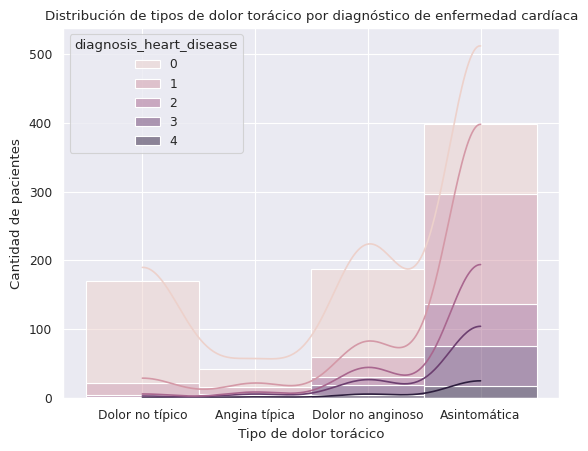

In [15]:
sns.histplot(data=df, x=df['chest_pain_type'].map({1: 'Angina típica', 2: 'Dolor no típico', 3: 'Dolor no anginoso', 4: 'Asintomática'}), hue='diagnosis_heart_disease', multiple='stack', kde=True )
plt.title('Distribución de tipos de dolor torácico por diagnóstico de enfermedad cardíaca')
plt.xlabel('Tipo de dolor torácico')
plt.ylabel('Cantidad de pacientes')
plt.show()

### Random forest

Se usará un random forest para determinar que variables son más relevantes sobre el tipo de diagnóstico y posteriormente analizarlas.

> **Nota**: se sabe de antemano que el dataset está desbalanceado, pues existen muchos casos con valor `1` como **diagnosis_heart_disease**, pues la base de datos de _Budapest_ no cuenta con valores superiores a 1, y generaliza la gravedad de la enfermedad. Se usará está técnica solamente para crear nociones más adelante.

In [16]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [17]:
# randomforest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix 

# codificación
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [18]:
def remove_labels(df, label_name):
    X = df.drop(label_name, axis=1)
    y = df[label_name].copy()
    return (X, y)

In [19]:
# Definir las columnas categóricas
categorical_features = ['city', 'sex', 'chest_pain_type']

# Crear el transformador de columnas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Crear el pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

In [20]:
# Aplicar el pipeline al dataframe original
df_onehot = pipeline.fit_transform(df)

# Convertir el resultado a DataFrame con nombres de columnas
onehot_columns = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
other_columns = [col for col in df.columns if col not in categorical_features]
df_onehot = pd.DataFrame(df_onehot, columns=list(onehot_columns) + other_columns, index=df.index)

In [21]:
df_onehot.head()

,city_Budapest,city_Cleveland,city_Long Beach,sex_female,sex_male,sex_nan,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,...,serum_cholestoral,fasting_blood_sugar,resting_EEG,maximum_heart_rate,exercise_induced_angina,ST_depression,slope_ST,number_major_vessels,thal,diagnosis_heart_disease
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,132.0,False,2.0,185.0,False,0.0,NaN,NaN,NaN,0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,243.0,False,0.0,160.0,False,0.0,NaN,NaN,NaN,0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,NaN,False,0.0,170.0,False,0.0,NaN,NaN,NaN,0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,237.0,False,1.0,170.0,False,0.0,NaN,NaN,6.0,0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,219.0,False,1.0,150.0,False,0.0,NaN,NaN,NaN,0


In [22]:
df_onehot['diagnosis_heart_disease'] = df_onehot['diagnosis_heart_disease'].map({
    0: 'No tiene enfermedad cardíaca',
    1: '1',
    2: '2',
    3: '3',
    4: '4',
})
df_onehot['diagnosis_heart_disease'].head()

0    No tiene enfermedad cardíaca
1    No tiene enfermedad cardíaca
2    No tiene enfermedad cardíaca
3    No tiene enfermedad cardíaca
4    No tiene enfermedad cardíaca
Name: diagnosis_heart_disease, dtype: object

In [23]:
df_onehot['diagnosis_heart_disease'].value_counts()

diagnosis_heart_disease
No tiene enfermedad cardíaca    403
1                               217
2                                77
3                                77
4                                23
Name: count, dtype: int64

#### Partimos el dataset codificado

In [24]:
train_set, test_set = train_test_split(df_onehot, test_size=0.3, shuffle=True, random_state=100)

In [25]:
X_train, y_train = remove_labels(train_set, 'diagnosis_heart_disease')
X_test, y_test = remove_labels(test_set, 'diagnosis_heart_disease')


In [26]:
clf = RandomForestClassifier(n_estimators=100, random_state=42,max_depth=10)
clf.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y

In [27]:
feature_importances = {name: score for name, score in zip(list(df), clf.feature_importances_)}
feature_importances_sorted = pd.Series(feature_importances).sort_values(ascending=False)
feature_importances_sorted.head(20)

exercise_induced_angina    0.154173
ST_depression              0.083194
number_major_vessels       0.075469
slope_ST                   0.066045
maximum_heart_rate         0.052603
city                       0.038269
diagnosis_heart_disease    0.027833
fasting_blood_sugar        0.024357
ID_patient                 0.017669
thal                       0.016803
resting_blood_pressure     0.013180
resting_EEG                0.013156
chest_pain_type            0.012862
sex                        0.012256
age                        0.011261
serum_cholestoral          0.007289
dtype: float64

Parece que variables **excercice_induced_angina**, **ST_depression** o **number_major_vessels**, parecen tener gran importancia en el resultado de diagnóstico y aún no se han hecho analisis de estas características.

### Analisis multivariable

<Figure size 1000x600 with 0 Axes>

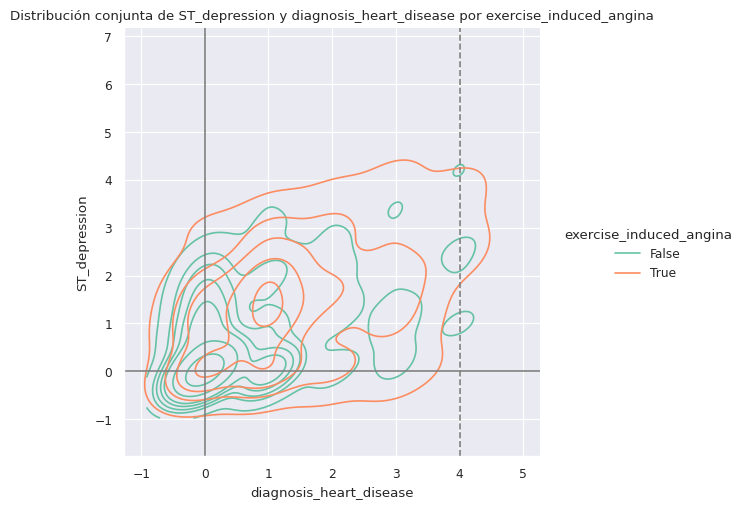

In [60]:
plt.figure(figsize=(10, 6))
sns.displot(
    data=df, 
    x='diagnosis_heart_disease', 
    y='ST_depression', 
    hue='exercise_induced_angina',
    kind='kde', 
    levels=8,
    )
plt.title('Distribución conjunta de ST_depression y diagnosis_heart_disease por exercise_induced_angina')
plt.ylabel('ST_depression')
plt.xlabel('diagnosis_heart_disease')
# plt.ylim(-0.5, 4.5)
# plt.xlim(-0.5, 7)
# plt.axvline(x=df['ST_depression'].mean(), color='red', linestyle='--', label='Media de ST_depression')
plt.axvline(x=0, color='gray', linestyle='-')
plt.axvline(x=4.01, color='gray', linestyle='--')
plt.axhline(y=0, color='gray', linestyle='-')


plt.show()

Parece haber cierta tendencia a entre el **ST_depression** y **diagnosis_heart_disease**, esta correlación se ve más claramente al separar el gráfico con los valores de **exercise_induced_angina**, pues cuando es `True`, es decir, se presentó dolor de pecho luego del esfuerzo físico, se muestran mayor densidad de registros positivos de enfermedad `1`y de enfermedades más graves.

Se puede ver que las excepciones son frecuentes, pero en su mayoría los registro de enfermedad `3` y `4` presentan dolor de pecho luego de esfuerzo.

> **Nota**: las lineas en este gráfico no representan presencia de algun resitro, sino densidad de frecuencia. A mayor némero de anillos o lineas, se presenta mayor frecuencia en cierto valores.

In [49]:
df['ST_depression']

count    741.000000
mean       0.914305
std        1.093141
min       -0.500000
25%        0.000000
50%        0.500000
75%        1.500000
max        6.200000
Name: ST_depression, dtype: float64